# Tensorflow Keras Image Classification using Convolution Neural Network


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook stat
print(tf.__version__)

1.15.0


## Sample network and training on MNIST dataset

Below is a sample code from the tensorflow keras library to model a cnn architecture, training it with a dataset and running inference.

Please go through it and try to understand the different classes and functions available in tensorflow keras to model a cnn architecture.



11493376/11490434 [==============================] - 0s 0us/step
train (60000, 28, 28)
test (10000, 28, 28)
train (60000, 28, 28, 1)
test (10000, 28, 28, 1)


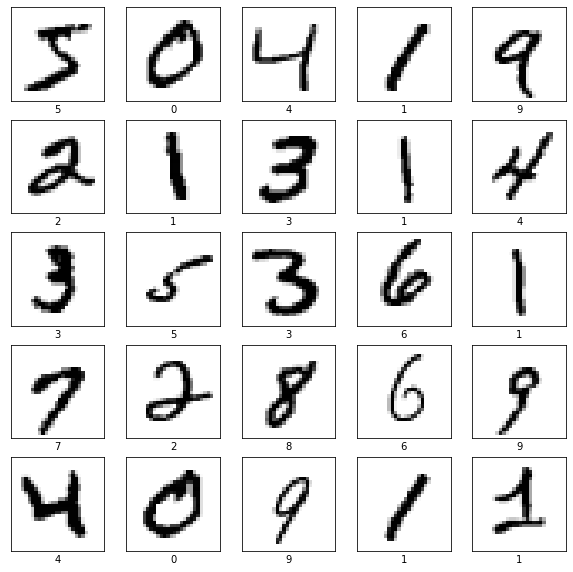

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
print("train",train_images.shape)
print("test",test_images.shape)
train_images = (train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32'))/255
test_images = (test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32'))/255
print("train",train_images.shape)
print("test",test_images.shape)
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

one = train_images[3]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vanila cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________

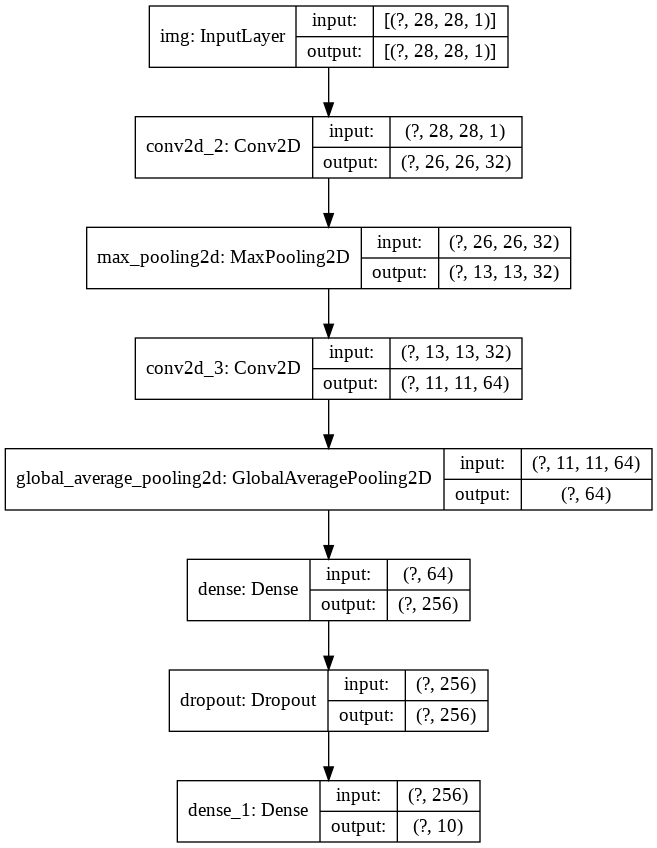

In [0]:
inputs = tf.keras.Input(shape=(28,28,1), name='img')
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.5)(x)
outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name='vanila cnn')
model.summary()
tf.keras.utils.plot_model(model, 'vanilla_cnn.png', show_shapes=True)


In [0]:

#y_train = tf.keras.utils.to_categorical(y_train, 10)
#y_test = tf.keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
_history = model.fit(train_images, train_labels,
          validation_data=(test_images, test_labels),
          batch_size=64,
          epochs=30,
          validation_split=0.2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 129us/sample - loss: 2.2988 - acc: 0.1160 - val_loss: 2.2701 - val_acc: 0.1753
Epoch 2/30
60000/60000 [==============================] - 4s 68us/sample - loss: 2.1066 - acc: 0.2253 - val_loss: 2.0004 - val_acc: 0.2646
Epoch 3/30
60000/60000 [==============================] - 4s 68us/sample - loss: 1.9755 - acc: 0.2616 - val_loss: 1.9137 - val_acc: 0.2767
Epoch 4/30
60000/60000 [==============================] - 4s 67us/sample - loss: 1.9154 - acc: 0.2808 - val_loss: 1.8517 - val_acc: 0.3034
Epoch 5/30
60000/60000 [==============================] - 4s 69us/sample - loss: 1.8620 - acc: 0.3016 - val_loss: 1.8163 - val_acc: 0.3148
Epoch 6/30
60000/60000 [==============================] - 4s 68us/sample - loss: 1.8269 - acc: 0.3146 - val_loss: 1.7689 - val_acc: 0.3364
Epoch 7/30
60000/60000 [==============================] - 4s 68us/sample - loss: 1.8089 - acc: 0.3208 - val_loss: 1

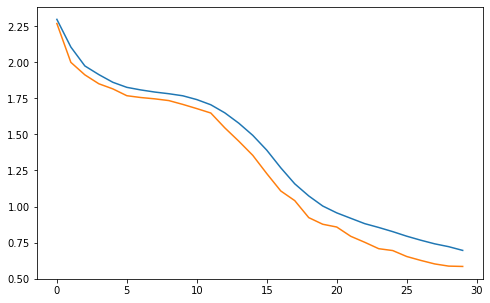

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(_history.history['loss'])
plt.plot(_history.history['val_loss'])


## Questions: Understanding Tensorflow Keras API  [2x5 = 10 points]

* What does "?" signify in the network diagram or None in the the model summary?


Here None specifies the batch size of the input. It is not necessary to mention the batch size while mentioning the input shape. If batch size is given while defining the input shape then it would replace the 'None' in the model summary and '?' in the network diagram.

* Why does layer conv2d_19 (Conv2D)  have 2 dimension less than the upper layer?


the shape of the output of the convolution layer is slightly lesser because, the kernel has a width greater than one and we compute the cross-correlation where the kernel fits completely with in the image. the output size of the convolution layer is determined by the input shape $(A X B)$ minus the convolution kernel size $(a x b)$ as $(A-a+1)\;and \;(B-b+1)$. in our case the input size is $(28 x 28)$ and kernel size is $(3x3)$, so the output size will be $(26x26)$

* what is stride?


Stride is referred as the number of rows and columns traversed per slide by the kernel. generally for computing the cross correlation, we slide the kernel through all locations starting from top left corner to bottom right right corner. and sometimes to increase the computational efficiency or downsample we move more than one location at a time skipping the intermediate location. and this movement is referred as stride. 

For example, consider a cross-correlation operation with stride of 3 vertically and 2 horizontally, if the second element of the first column is the output then the kernel is slides down three rows and if the second element in the first row is the output, the the kernel slides two colums to the right.


* Difference between MaxPooling2D and GlobalAveragePooling2D ?


like convolutional layers, pooling operators consists of similar fixed shape windows that traverse over all the locations either to compute maximum or average of the elements in that pooling window.

Maxpooling2D is a maximum pooling window of 2 dimension, which computes the maximum of the elements in that particular window. The results are downsapled or max pooled feature maps that highlight the most present feature in that window. This works better for image classification problems.

Global Average Pooling is an operation that calculates the average output of each feature map in the previous layer. This fairly simple operation reduces the data significantly and prepares the model for the final classification layer. it helps in the removal of a large number of trainable parameters from the model.

Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.


* What is sparse_categorical_crossentropy loss function ?

it is a loss function which performs the calculation of the error without requiring that the target variable be one hot encoded values.

for example, if the target variables are one-hot encoded like [1,0,0] , [0,1,0], [0,0,1] then use the categorical-crossentropy loss function,

if the target variables are integers, say [1], [2], [3]..., then we use sparse categorical crossentropy loss functions.


# Build different convolutions in Numpy

In the questions below you will learn the workings of different convolution network by implementing them in python numpy.

There are different kinds of convolution which has been implemented in different neural architectures. The most popular ones are :

1. Simple Convolution
2. Atrous Convolution
3. Depth wise Convolution
4. Point wise Convolution
5. Depth wise separable Convolution

Good summary can be found here
[convolutions-types]( https://ikhlestov.github.io/pages/machine-learning/convolutions-types/). 

The task is to read about them and implement them using numpy

In [3]:
# Helper functions
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3).astype('float32')

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

one = train_images[3]
def plot_convolution_images(image, convoled_image):
        
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title("Image")
    plt.imshow(image.reshape((32,32,3)))
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(convoled_image.reshape((32,32)))
    plt.title("Convolution")
    plt.show()

170500096/170498071 [==============================] - 6s 0us/step


### Sample: Simple Convolution 

(32, 32, 3)
(64, 32, 32)


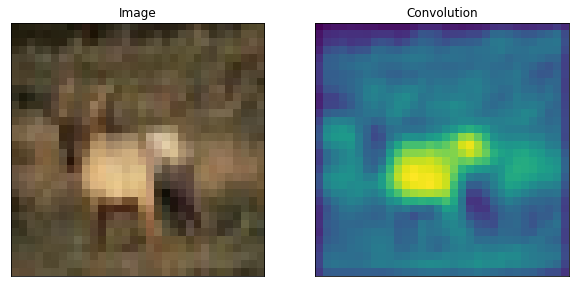

In [4]:
import numpy as np

def myConv2D(image: np.ndarray, 
             filter_size: int, 
             kernel_size: int):
    """
    myConv2D convolutions.
    Args:
        image: (hi, wi, cin).
        filter_size: (fs). The number of output filters
        kernel_size: (ks)
    Returns:
        (fs, hi, wi)
    """
    print(image.shape)
  
    kernels = np.random.rand(kernel_size, kernel_size, image.shape[-1], filter_size )
    
    out = np.zeros([filter_size, image.shape[0], image.shape[1]])
    pad = kernel_size // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')
    
    for idx_c_out in range(filter_size):
        for idx_row in range(image.shape[0]):
            for idx_col in range(image.shape[1]):
                kernel = kernels[:, :, :, idx_c_out]
                patch = image_padded[idx_row: idx_row + kernel_size, idx_col: idx_col + kernel_size]
                out[idx_c_out, idx_row, idx_col] += (kernel * patch).sum()
    
    return out

# Create inputs
#image = np.random.rand(28, 28, 1).astype(np.float32)
kernel_size = 3
filters = 64
convolved = myConv2D(one, filters, kernel_size)
print (convolved.shape)
plot_convolution_images(one, convolved[0])

In [0]:
np.pad()

## Question: Extend Simple Convolution to accomodate Atrous/Dilated Convolution in numpy [10 points]

(3, 3, 3, 64)


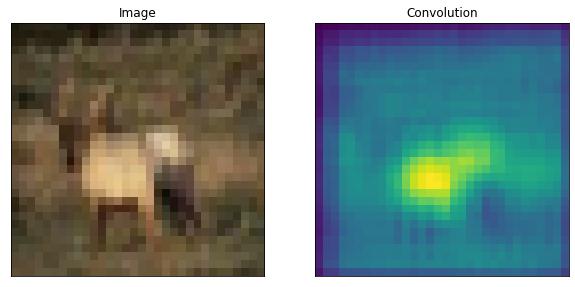

(3, 3, 3, 64)


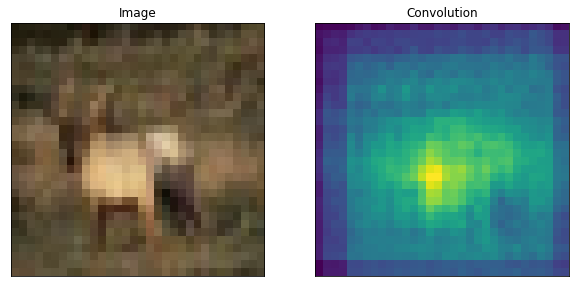

In [5]:
def myConv2DWithDilation(image: np.ndarray, 
             dilation_rate: int, 
             filter_size: int,
             kernel_size: int):
    """
    myConv2D convolutions.
    Args:
        image: (hi, wi, cin)
        dilation_rate: (dr) 
        filter_size: (ds)
        kernel_size: (ks)
    Returns:
        ( ?????Fill this ???? )
    """
    kernels = np.random.rand(kernel_size, kernel_size, image.shape[-1], filter_size )
    print(kernels.shape)
    n_ex, in_rows, in_cols, n_in = kernels.shape
    r_ix = np.repeat(np.arange(1, in_rows), dilation_rate-1)
    c_ix = np.repeat(np.arange(1, in_cols), dilation_rate-1)
    Xd = np.insert(kernels, r_ix, 0, axis=1)
    Xd = np.insert(Xd, c_ix, 0, axis=0)
    out = np.zeros([filter_size, image.shape[0], image.shape[1]])
    pad = kernel_size*dilation_rate // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')
    
    for idx_c_out in range(filter_size):
        for idx_row in range(image.shape[0]):
            for idx_col in range(image.shape[1]):
                kernel = Xd[:, :, :, idx_c_out]
                patch = image_padded[idx_row: idx_row + (kernel_size*dilation_rate - (dilation_rate-1))
                                     , idx_col: idx_col + (kernel_size*dilation_rate - (dilation_rate-1))]
                out[idx_c_out, idx_row, idx_col] += (kernel * patch).sum()
    return out, kernels

kernel_size = 3
filters = 64
dilation = 2
convolved, kernels = myConv2DWithDilation(one, dilation, filters, kernel_size)
plot_convolution_images(one, convolved[0])
dilation = 3
convolved, kernels = myConv2DWithDilation(one, dilation, filters, kernel_size)
plot_convolution_images(one, convolved[0])

## Question: Implement a DepthwiseConvolution  in numpy [10 points]

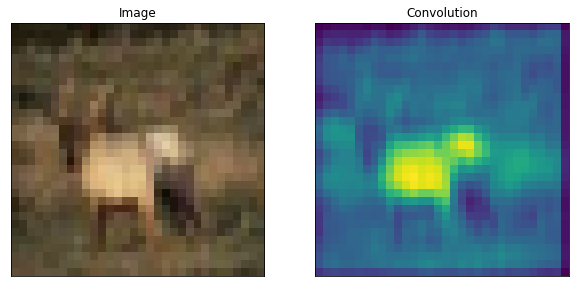

In [6]:
def myDepthWiseConv2D(image: np.ndarray, 
             depth_multiplier: int, 
             kernel_size: int):
    """
    myConv2D convolutions.
    Args:
        image: (hi, wi, cin).
        depth_multiplier: (ds).The number of depthwise convolution output channels for each input channel
        kernel_size: (ks)
    Returns:
        (ds * cin, hi, wi)
    """

    kernels = np.random.rand(kernel_size, kernel_size, image.shape[-1], depth_multiplier )
    # c = kernels.shape[-1]
    out = np.zeros([image.shape[2] * depth_multiplier, image.shape[0], image.shape[1]])
    out1 = np.zeros([image.shape[0], image.shape[1],image.shape[2] * depth_multiplier])
    pad = kernel_size // 2
    image_padded = np.pad(image, [(pad,), (pad,), (0,)], 'constant')

    for idx_cin in range(image.shape[2]):
      for idx_row in range(image.shape[0]):
        for idx_col in range(image.shape[1]):
          patch = image_padded[idx_row: idx_row + kernel_size, idx_col: idx_col + kernel_size]
          for idx_cmul in range(depth_multiplier):
            kernel = kernels[:, :, idx_cin, idx_cmul]
            out[idx_cin * depth_multiplier + idx_cmul, idx_row, idx_col] = (kernel * patch).sum()
            out1[idx_row, idx_col,idx_cin * depth_multiplier + idx_cmul] = (kernel * patch).sum()


    return out, out1


kernel_size = 3
filters = 64
convolved, test = myDepthWiseConv2D(one, filters, kernel_size)
plot_convolution_images(one, convolved[0])

## Question: Combine Depthwise and Pointwise and implement a Depthwise Separable Convolution in numpy [10 points]

(32, 32, 192)


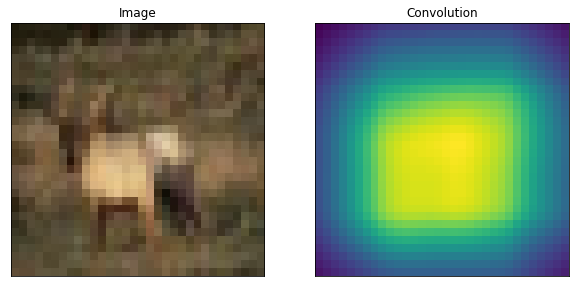

In [7]:
def myDepthWiseSeparableConv2D(image: np.ndarray,
                              depth_multiplier: int,
                              filters_pointwise: int,
                              kernel_size: int):
    """
    Depthwise separable convolutions.
    Args:
        image: (hi, wi, cin).
        depth_multiplier: (ds).The number of depthwise convolution output channels for each input channel
        filters_pointwise: (ps). The number of pointwise convolution output channels for each input channel
        kernel_size: (ks)
    Returns:
        (???? Fill this ????? )
    """
    convolved, img = myDepthWiseConv2D(image, depth_multiplier, kernel_size)
    out = myConv2D(img, depth_multiplier, filters_pointwise)

    return out


kernel_size = 3
filters = 64
pointwise_filters = 16
dilation = 2
convolved = myDepthWiseSeparableConv2D(one, filters, pointwise_filters, kernel_size)
plot_convolution_images(one, convolved[0])

## Questions: Understanding Convolution [2x5 = 10 points]

* What are the advantages of Atrous/Dilated convolutions? For which tasks are they used?

These convolutions introduces a new parameter to convolution layers called dialation rate. this specifies the spaceing between the values in kernel.

This delivers a wider field of view at the same computational cost.

Dilated convolutions have been shown to decrease blurring in semantic segmentation maps, and are purported to work at least in part by extracting long range information without the need for pooling.

tasks which uses dilated convolutions:

semantic image segmentation.\
object detection\
audio generation\
video modeling\
machine translation



* What are advantages of Depthwise convolution over normal convolution?

Amount of computations in Depthwise convolution is less than the normal convolution. which means that depthwise convolution are faster than normal convolutions. This also makes the depthwise convolutions computationally cheaper.

the total number of parameters in case of normal convolution is more, which increases the risk of over fitting of the data, which is not the case of depthwise convolution.





# Build different Activation function

In this section we will learn about different activation functions.

## Question: Softmax Activation [5 points]

In [0]:
def softmax(x: np.ndarray):
    ## YOUR CODE HERE

    y = np.exp(x)
    out = np.exp(x)/np.sum(y)

    return out

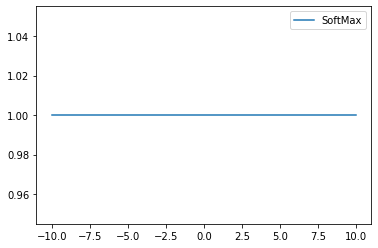

In [0]:
# plot inputs and outputs
import matplotlib.pyplot as plt
 
# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [softmax(x) for x in series_in]
# line plot of raw inputs to rectified outputs
plt.plot(series_in, series_out, label='SoftMax')
plt.legend()
plt.show()

## Question: Build a leaky RELU Activation function [5 points]

In [0]:
def leakyrelu(x: np.ndarray,
              leaky_rate: float):
    
    out = np.maximum(leaky_rate*x, x)

    return out

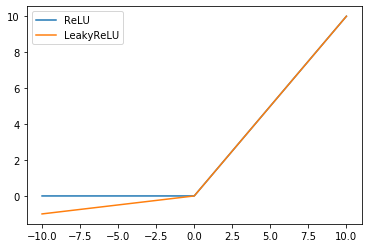

In [0]:
# plot inputs and outputs
import matplotlib.pyplot as plt
 
# rectified linear function
def rectified(x):
	return max(0.0, x)
 
# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
series_out1 = [leakyrelu(x, 0.1) for x in series_in]
# line plot of raw inputs to rectified outputs
plt.plot(series_in, series_out, label='ReLU')
plt.plot(series_in, series_out1, label='LeakyReLU')
plt.legend()
plt.show()

## Question: Build a Swish Activation function [10 points]

Details of the swish activation function can be found in section 4 of the paper [SEARCHING FORACTIVATIONFUNCTIONS](https://arxiv.org/pdf/1710.05941.pdf)

In [0]:
def swish(x: np.ndarray,
          beta: float):
    
    out = []
    for item in x:
               #(the sigmoid function)
        out.append(np.dot(item, (1/(1+math.exp(beta * -item)))))

    return out


def sigmoid(x):
    a = []
    for item in x:
               #(the sigmoid function)
        a.append(1/(1+math.exp(-item)))
    return a


def firstderswish(x: np.ndarray,
                  beta: float):
    out=[]
    for item in x:
      f1 = np.dot(item, (1/(1+np.exp(-beta*item))))
      sig = (1/(1+np.exp(-beta*item)))
      f = beta*f1 +  np.dot(sig, (1-beta*f1))
      out.append(f)

    return out

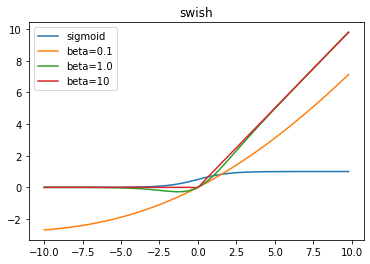

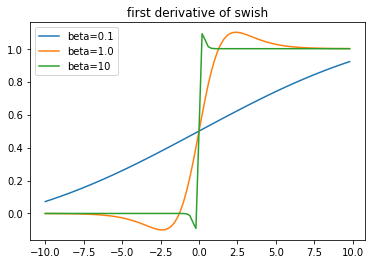

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)

y = sigmoid(x)
y1 = swish(x, 0.1)
y2 = swish(x, 1.0)
y3 = swish(x, 10)
y4 = firstderswish(x, 0.1)
y5 = firstderswish(x, 1.0)
y6 = firstderswish(x, 10)


a = plt.figure(1)
plt.title('swish')
plt.plot(x,y, label='sigmoid')
plt.plot(x,y1, label='beta=0.1')
plt.plot(x,y2,label='beta=1.0')
plt.plot(x,y3,label='beta=10')
plt.legend()
a.show()
b = plt.figure(2)
plt.title('first derivative of swish')
plt.plot(x,y4, label='beta=0.1')
plt.plot(x,y5,label='beta=1.0')
plt.plot(x,y6,label='beta=10')
plt.legend()
b.show()

# Explain a fractional Max pooling function [10 points]

Fractional Max pooling was introduced by the paper [Benjamin Graham, Fractional Max-Pooling](https://arxiv.org/abs/1412.6071)

Explain below the difference between normal max pooling and fractional max pooling ?

Is the fractional version of max-pooling in which multiplicative factor($ \alpha $) is allowed to take non-integer value within a range of $ 1< \alpha<2 $.

The size of hidden layers is reduced by a fractional factor which provides an oppurtunity to view an image at a different scale.

FMP introduces randomness which is associated with the choice of pooling region due to its stochastic nature. The region of pooling can either be overlapped or disjoint which is selected either randomly or pseudo-randomly with the use of dropout and training data augmentation.

The use if fractional max pooling with overlapped region of pooling works better than the disjoint one.

It is also noted that pseudorandom selection of pooling region with data augmentation performs better when compared to random selection.

Max pooling:
* Its statistical properties makes it capable of fitting sparse representation.
*Perform betters when coupled with spare coding and simple linear classifiers.
* Due to elimination of non-maximal components, computation for upper layers are reduced.
* Is deterministic in nature
* The discerning features get disappeared when majority of the elements in the pooling area are present in high magnitudes.

Fractional Max-out Pooling:
* Is stochastic in nature
* Randomness or pseudorandomness in selection of pooling region.
* Good performance of pseudorandomness selection with data augmentation.
* Superior result is obtained by overlapping instead of disjoint fractional max pooling
* random selection of pooling region reduces the model performance.
* Disjoint fractional max pooling causes performance degradation.

## Total hours spent

Please report the total time invested in solving the assignment below

In [0]:
total_time_invested = 30